In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob as gb 
import cv2
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
train="/media/qasim/STUDY/zFreeLancer/hAI/archive/seg_train/seg_train/"
test="/media/qasim/STUDY/zFreeLancer/hAI/archive/seg_test/seg_test/"
pred="/media/qasim/STUDY/zFreeLancer/hAI/archive/seg_pred/seg_pred/"

In [3]:
for folder in os.listdir(train):
    files=gb.glob(pathname=str(train+folder +"/*.jpg"))
    print(f" {len(files)} images are founnd in '{folder}' folder of training data.")

 2191 images are founnd in 'buildings' folder of training data.
 2271 images are founnd in 'forest' folder of training data.
 2404 images are founnd in 'glacier' folder of training data.
 2512 images are founnd in 'mountain' folder of training data.
 2274 images are founnd in 'sea' folder of training data.
 2382 images are founnd in 'street' folder of training data.


In [4]:
for folder in os.listdir(test):
    files=gb.glob(pathname=str(test+folder +"/*.jpg"))
    print(f" {len(files)} images are founnd in '{folder}' folder of testing data.")


 437 images are founnd in 'buildings' folder of testing data.
 474 images are founnd in 'forest' folder of testing data.
 553 images are founnd in 'glacier' folder of testing data.
 525 images are founnd in 'mountain' folder of testing data.
 510 images are founnd in 'sea' folder of testing data.
 501 images are founnd in 'street' folder of testing data.


In [5]:
files= gb.glob(pathname=str(pred + "/*.jpg"))
print(f"{len(files)} are found in predict data.")

7301 are found in predict data.


In [6]:
# Splitting image data
image_resize = 100

scenes ={"buildings":0,"forest":1,"glacier":2,"mountain":3,"sea":4,"street":5}
def place(n):
    for item in scenes:
        if n == scenes[item]:
            return item

In [7]:
#Training Data

X_train = []
y_train = []

for folder in os.listdir(train):
  images = gb.glob(pathname=str(train + folder +"/*.jpg"))
  for image in images:
    train_image = cv2.imread(image)
    image_size = cv2.resize(train_image,(image_resize,image_resize))
    X_train.append(image_size)
    y_train.append(scenes[folder])

print(len(X_train),len(y_train))

14034 14034


In [8]:
print(type(X_train))

<class 'list'>


(100, 100, 3)
uint8


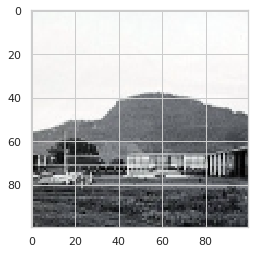

In [9]:
plt.imshow(X_train[0])
print(X_train[0].shape)
print(X_train[0].dtype)

In [10]:
# Testing Data

X_test = []
y_test = []

for folder in os.listdir(test):
  images =gb.glob(pathname=str(test+folder +"/*.jpg"))
  for image in images:
    train_image = cv2.imread(image)
    resized_image = cv2.resize(train_image,(image_resize,image_resize))
    X_test.append(resized_image)
    y_test.append(scenes[folder])

print(len(X_test),len(y_test))

3000 3000


In [11]:
# Prediction Data

X_pred = []
images = gb.glob(pathname= str(pred + '/*.jpg'))
for image in images: 
    pred_image = cv2.imread(image)
    resized_image = cv2.resize(pred_image, (image_resize,image_resize))
    X_pred.append(resized_image) 


print(len(X_pred))
print(type(X_pred))

7301
<class 'list'>


In [12]:
# Displays 6 pictures from each dataset
import random
def list_images(dataset, dataset_y, y_label=""):
    plt.figure(figsize=(15,15))
    
    for i in range(6):
        plt.subplot(1,6,i+1)
        index = random.randint(0,len(dataset))
        plt.imshow(dataset[index])
        
        plt.xlabel(place(dataset_y[index]))
        plt.ylabel(y_label)
        plt.xticks([])
        plt.yticks([])
    
    plt.tight_layout(pad = 0, w_pad = 0, h_pad = 0)
    plt.show()
        

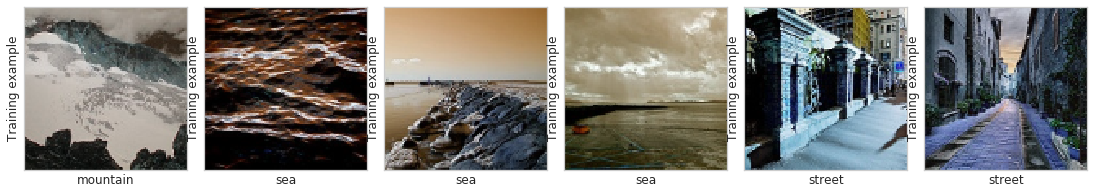

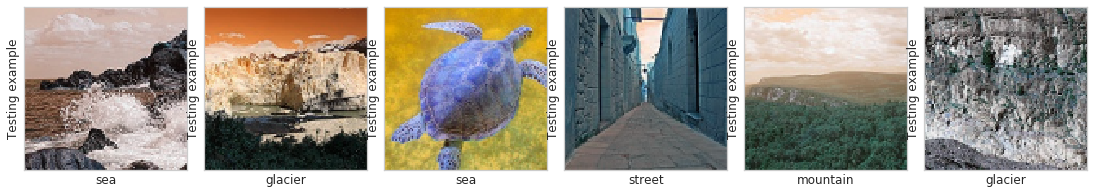

In [13]:
list_images(X_train, y_train, "Training example")
list_images(X_test, y_test, "Testing example")

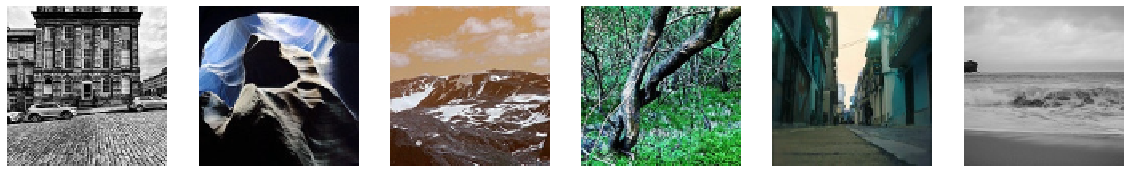

In [14]:
# Prediction Images
plt.figure(figsize=(20,20))
for n,i in enumerate(np.random.randint(0,len(X_pred),6)):
    plt.subplot(1,6,n+1)
    plt.imshow(X_pred[i])
    plt.axis("off")

In [15]:
# Final Processing of images
def gray(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

def equalize(img):
  img = cv2.equalizeHist(img)
  return img

def preprocessor(img):
  img = gray(img)
  img = equalize(img)
  img = img/255
  return img

In [16]:
X_train_processed = np.array(list(map(preprocessor,X_train)))
X_test_processed = np.array(list(map(preprocessor,X_test)))
X_pred_processed = np.array(list(map(preprocessor,X_pred)))

(100, 100)
float64


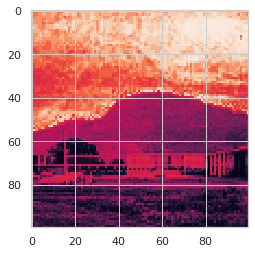

In [17]:
plt.imshow(X_train_processed[0])
print(X_train_processed[0].shape)
print(X_train_processed[0].dtype)

In [18]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,6)
y_cat_test = to_categorical(y_test,6)

X_train_rprocessed = X_train_processed.reshape(14034,100,100,1)
X_test_rprocessed = X_test_processed.reshape(3000,100,100,1)
X_pred_rprocessed = X_pred_processed.reshape(7301,100,100,1)

print(X_train_rprocessed.shape)
print(y_cat_train.shape)
print(X_test_rprocessed.shape)
print(y_cat_test.shape)
print(X_pred_rprocessed.shape)


(14034, 100, 100, 1)
(14034, 6)
(3000, 100, 100, 1)
(3000, 6)
(7301, 100, 100, 1)


In [29]:
'''
# Data Reading is complete
# Data Preprocessing

X_train_processed = np.array(X_train)
X_test_processed = np.array(X_test)
y_train_processed = np.array(y_train)
y_test_processed = np.array(y_test)
X_pred_processed = np.array(X_pred)


'''

'\n# Data Reading is complete\n# Data Preprocessing\n\nX_train_processed = np.array(X_train)\nX_test_processed = np.array(X_test)\ny_train_processed = np.array(y_train)\ny_test_processed = np.array(y_test)\nX_pred_processed = np.array(X_pred)\n\nprint(X_train_processed.shape)\nprint(y_train_processed.shape)\nprint(X_test_processed.shape)\nprint(y_test_processed.shape)\nprint(X_pred_processed.shape)\n'

In [19]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [20]:
# CNN model 

model = Sequential()
model.add(Conv2D(256,kernel_size=(5,5),input_shape=(100,100,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4),strides=(2,2)))
model.add(Conv2D(124,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4),strides=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation="softmax"))
    
          

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 256)       6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 43, 124)       793724    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 124)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        71488     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkPoint=ModelCheckpoint("intel-img-class.h5")
earlyStopping=EarlyStopping(patience=10,restore_best_weights=True)


In [21]:
#train_data = tf.data.Dataset.from_tensor_slices((X_train_rprocessed, y_cat_train))


history = model.fit(
    X_train_rprocessed,
    y_cat_train,
    validation_split = 0.33,
    epochs=30,
    #batch_size=300,
    #shuffle =1,
    #callbacks=[checkPoint,earlyStopping]
)


Epoch 1/30
439/439 [==============================] - 1439s 3s/step - loss: 1.5539 - accuracy: 0.3167
Epoch 2/30
439/439 [==============================] - 1425s 3s/step - loss: 1.1341 - accuracy: 0.5535
Epoch 3/30
439/439 [==============================] - 1423s 3s/step - loss: 0.9591 - accuracy: 0.6369
Epoch 4/30
439/439 [==============================] - 1420s 3s/step - loss: 0.8239 - accuracy: 0.6975
Epoch 5/30
439/439 [==============================] - 1422s 3s/step - loss: 0.7622 - accuracy: 0.7271
Epoch 6/30
439/439 [==============================] - 1423s 3s/step - loss: 0.6678 - accuracy: 0.7606
Epoch 7/30
439/439 [==============================] - 1419s 3s/step - loss: 0.6289 - accuracy: 0.7739
Epoch 8/30
439/439 [==============================] - 1421s 3s/step - loss: 0.5549 - accuracy: 0.8018
Epoch 9/30
439/439 [==============================] - 1418s 3s/step - loss: 0.4889 - accuracy: 0.8266
Epoch 10/30
439/439 [==============================] - 1421s 3s/step - loss: 0.410

In [22]:
#Accuracy check
score = model.evaluate(X_test_rprocessed,y_cat_test)
print('Test Accuracy = ',score[1])

94/94 [==============================] - 84s 896ms/step - loss: 1.9670 - accuracy: 0.7207
Test Accuracy =  0.7206666469573975


In [24]:
import tensorflow
keras_file = "intel-img-class.h5"
tensorflow.keras.models.save_model(model, keras_file)

In [83]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

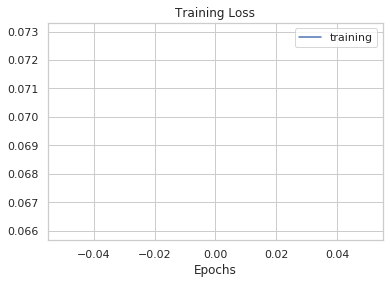

In [85]:
# Training Graphs

plt.plot(history.history['loss'])
plt.legend(['training'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.show()

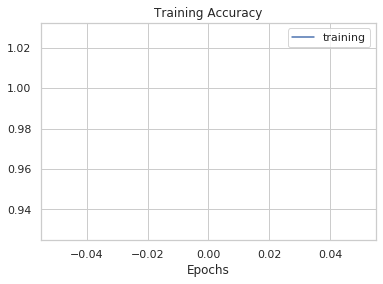

In [86]:
# Validation Graphs

plt.plot(history.history['accuracy'])
plt.legend(['training'])
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.show()

In [87]:
#Confusion Matrix from testing data
cm_pred = model.predict_classes(X_test_rprocessed)
y_true_label = y_cat_test

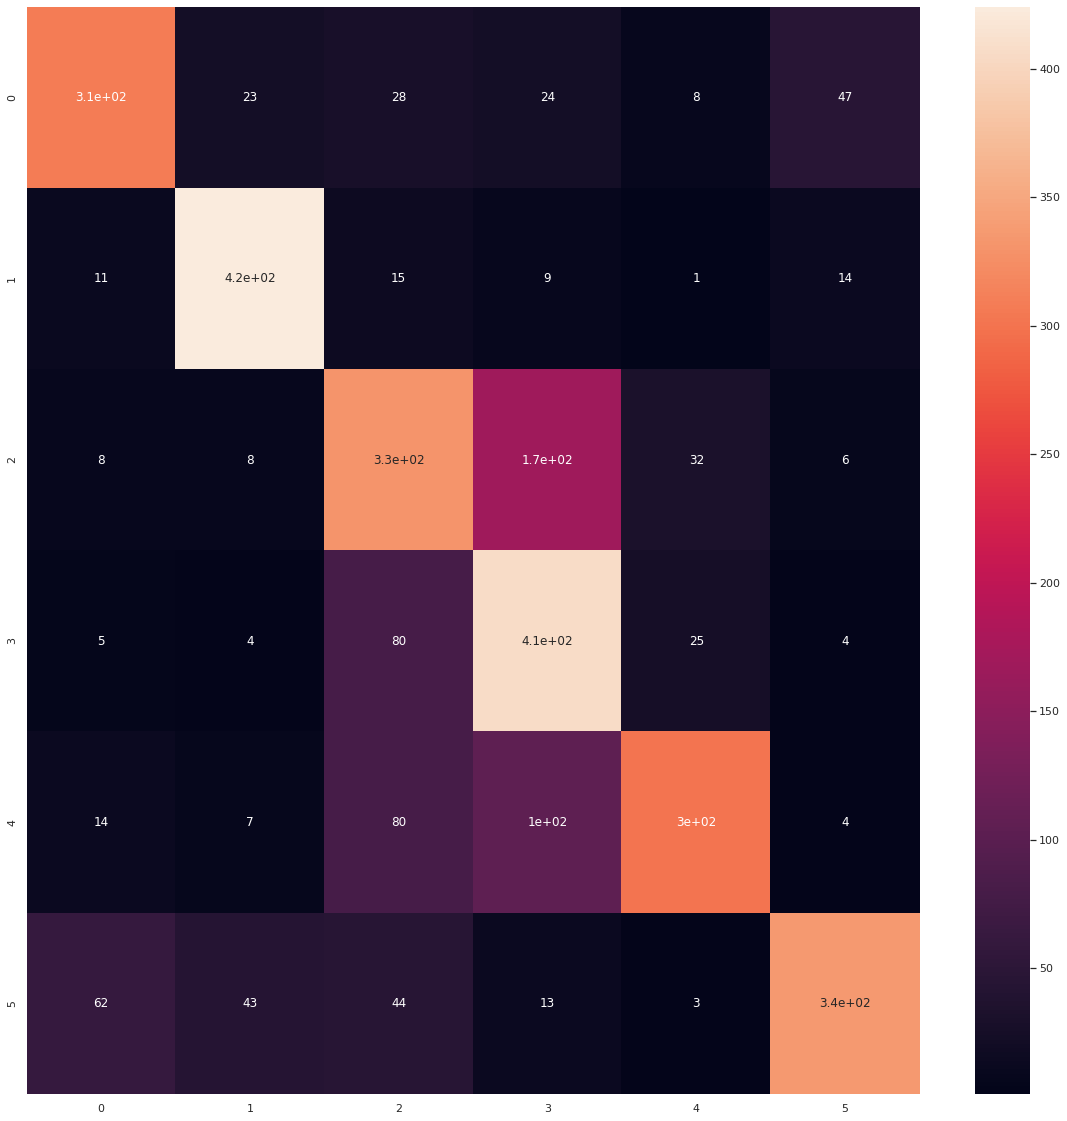

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cm_pred)
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)

In [77]:
# Actual Prediction
ypred=model.predict(X_pred_rprocessed)

(7301, 6)
float32


In [89]:
print(ypred.shape)
print(ypred.dtype)


(7301, 6)
float32


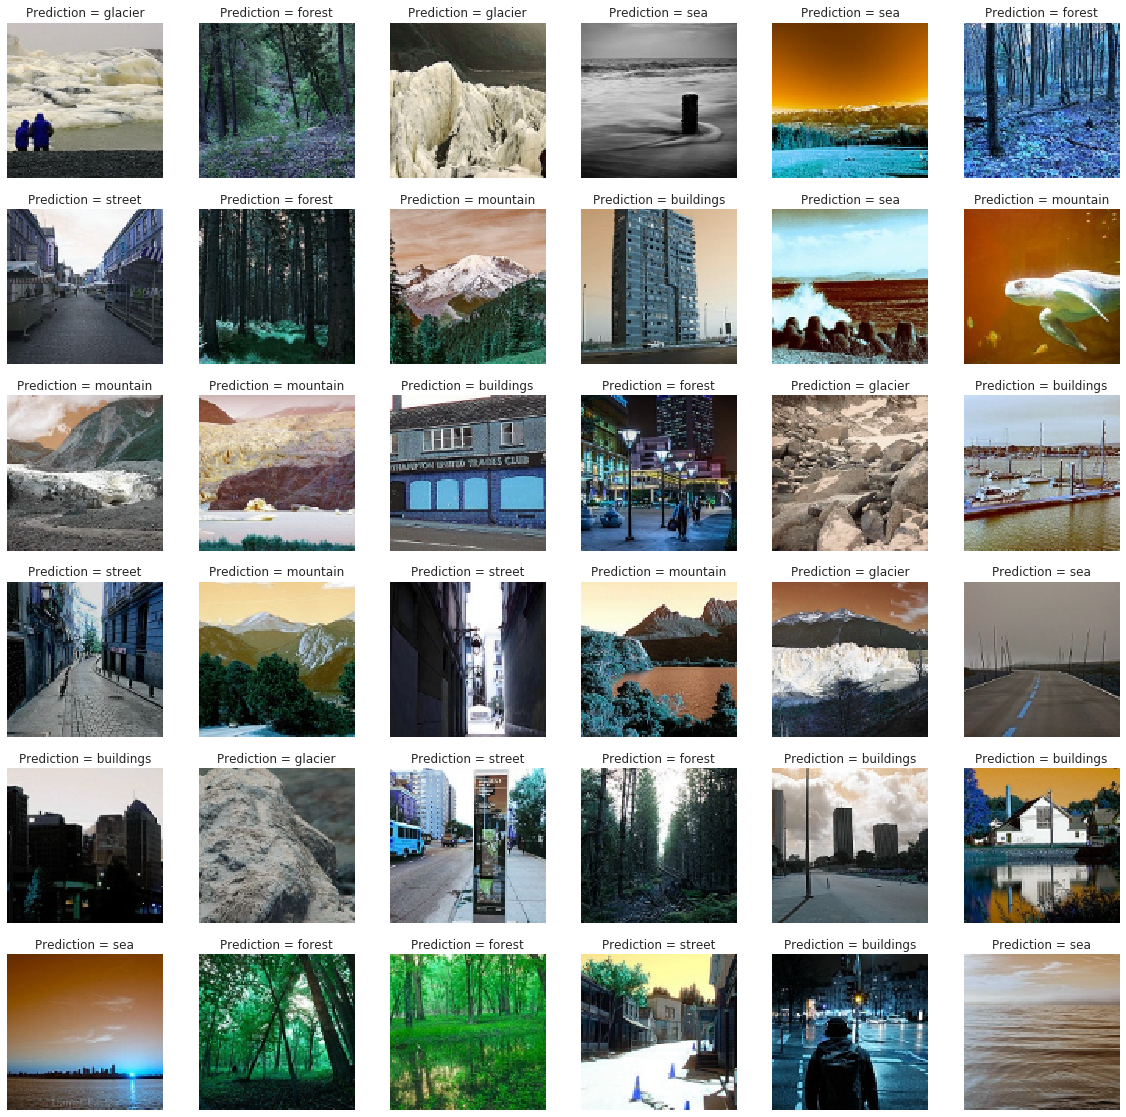

In [91]:
plt.figure(figsize=(20,20))
for n, i in enumerate (np.random.randint(0,len(X_pred),36)):
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])
    plt.axis("off")
    plt.title('Prediction = {}'.format(place(np.argmax(ypred[i]))))
    

#place(np.argmax(ypred[i]))